In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def handle_missingValues_simple(incomplete_data):

    complete_data = incomplete_data.fillna(method='bfill').fillna(method='ffill')
    return complete_data

def handle_outliers(noisy_data):

    cleaned_data=noisy_data
    for column in cleaned_data:
        cleaned_data[column] = cleaned_data[column].rolling(window=2,center=True).median().fillna(method='bfill').fillna(method='ffill')
    return cleaned_data


In [5]:
productprices = pd.read_csv(open("data/market-prices-all-products_en.csv", "r"), encoding='utf-8', engine='c', header=0)
productprices=productprices.set_index('Country')
productprices=handle_missingValues_simple(productprices)
productprices=handle_outliers(productprices)
productprices.head()

,"ï»¿""Category""",Sector code,Product code,Product desc,Product Brief Description,Unit,Period,MP Market Price
Country,,,,,,,,
AT,Animal products,OEV,0207 11 30,Chicken,"Broiler - Poulet, 65%",â‚¬/100 kg carcass weight,201903.0,199.200
BE,Animal products,OEV,0207 11 30,Chicken,"Broiler - Poulet, 65%",â‚¬/100 kg carcass weight,201903.0,199.200
BG,Animal products,OEV,0207 11 30,Chicken,"Broiler - Poulet, 65%",â‚¬/100 kg carcass weight,201903.0,159.055
CY,Animal products,OEV,0207 11 30,Chicken,"Broiler - Poulet, 65%",â‚¬/100 kg carcass weight,201903.0,201.230
CZ,Animal products,OEV,0207 11 30,Chicken,"Broiler - Poulet, 65%",â‚¬/100 kg carcass weight,201903.0,231.785


In [6]:
subset=productprices[(productprices["Product code"]=="254")][["Period","MP Market Price"]]
subset["Period"]=subset["Period"]/100
subset["Period"]=subset["Period"].apply(np.floor)

subset=subset.set_index('Period')
subset=subset.groupby(subset.index)['MP Market Price'].mean().reset_index()
subset=subset[(subset['Period']<2019)&(subset['Period']>2004)]

In [7]:
privateUniversityStudents = pd.read_csv(open("data/OGD_uptstud_ext_UPT_S_1.csv", "r"), encoding='utf-8', engine='c', header=0,sep=";")
metadata=pd.read_csv(open("data/OGD_uptstud_ext_UPT_S_1_C-BER_ZEIT-0.csv", "r"), encoding='utf-8', engine='c', header=0,sep=";")


privateUniversityStudents=privateUniversityStudents.set_index("C-BER_ZEIT-0")
metadata=metadata.set_index("code")

privateUniversityStudents=privateUniversityStudents.join(metadata,how='inner').reset_index()
print(privateUniversityStudents.head())
privateUniversityStudents=privateUniversityStudents[2:]


   C-BER_ZEIT-0  F-STUDPG  F-STUDPNG                 name  Unnamed: 2  \
0  BER_ZEIT-031      1369        422  Studienjahr 2003/04         NaN   
1  BER_ZEIT-041      1345        368  Studienjahr 2004/05         NaN   
2  BER_ZEIT-051      3608       1532  Studienjahr 2005/06         NaN   
3  BER_ZEIT-061      3872       1235  Studienjahr 2006/07         NaN   
4  BER_ZEIT-071      4237       1426  Studienjahr 2007/08         NaN   

                 en_name  de_desc  de_link  en_desc  en_link  de_syn  en_syn  
0  academic year 2003/04      NaN      NaN      NaN      NaN     NaN     NaN  
1  academic year 2004/05      NaN      NaN      NaN      NaN     NaN     NaN  
2  academic year 2005/06      NaN      NaN      NaN      NaN     NaN     NaN  
3  academic year 2006/07      NaN      NaN      NaN      NaN     NaN     NaN  
4  academic year 2007/08      NaN      NaN      NaN      NaN     NaN     NaN  


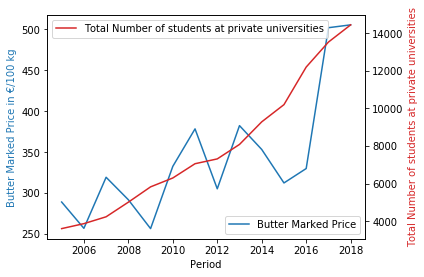

In [8]:
subset= subset.assign(PrivateStudents=pd.Series(privateUniversityStudents["F-STUDPG"]).values)


fig, ax1 = plt.subplots()
ax1 = subset.plot(x="Period", y="MP Market Price",ax=ax1,color='tab:blue')
ax1.set_ylabel('Butter Marked Price in €/100 kg', color='tab:blue')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2 = subset.plot(x="Period", y="PrivateStudents",ax=ax2,color='tab:red')
ax2.set_ylabel('Total Number of students at private universities', color='tab:red')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.legend(['Total Number of students at private universities'],loc=0)
ax1.legend(['Butter Marked Price'],loc=4)
plt.savefig('Figure.png', bbox_inches='tight')
plt.show()


In [9]:
subset=subset.set_index('Period')
subset.to_csv('output.csv', sep=',', encoding='utf-8')